In [1]:
%load_ext autoreload
%autoreload 2

# Create a map of Rome to show our trip with my girlfriend. 
Data from Google Maps are cutted to protect my privacy.

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

import matplotlib.pyplot as plt
import plotly.express as px

import networkx as nx
import osmnx as ox
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

# import json

import matplotlib.pyplot as plt
import random

from tqdm.notebook import tqdm

# import os 

# import datetime

# import momepy

from shapely.geometry import Polygon

ox.config(use_cache=True, log_console=True)

c:\Users\Tom\anaconda3\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [3]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    """
    This function takes a location, a distance and a transport mode and return a graph

    Parameters
    ----------
    loc : string
        location of the center of the graph
    dist : int
        distance in meters
    transport_mode : string
        transport mode: 'walk', 'bike', 'drive', 'drive_service', 'all', 'all_private', 'none'
    loc_type : string, optional
        location type: 'address', 'bbox', 'point', 'node', 'poly', 'place', 'network_type'. The default is "address".
    
    Returns
    -------
    G : graph
        graph
    """
    if loc_type == "address":
        G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G


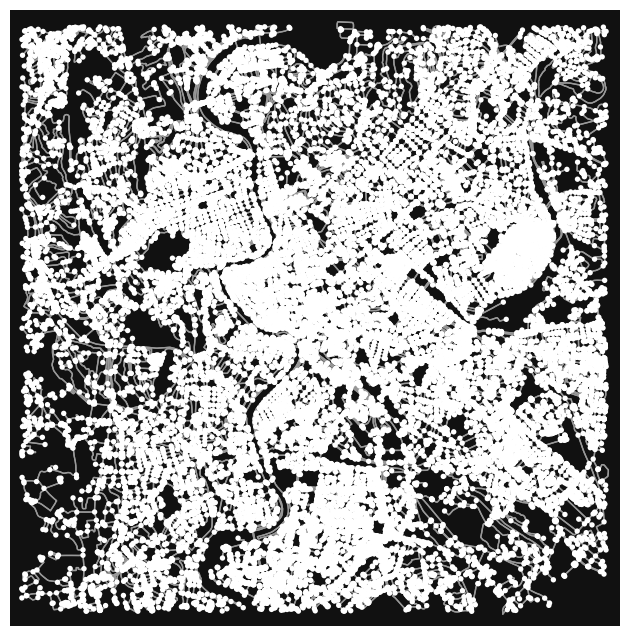

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [4]:
G1 = create_graph("Roma,Italy", 5000, "walk")
ox.plot_graph(G1)

In [5]:
dff=pd.read_csv('data.csv')
dff

time  start_lat  start_long   end_long    end_lat
0     1  41.895578   12.498542  12.491864  41.894232
1    10  41.895706   12.490471  12.478532  41.896052

Data are cutted, we can see just the first 2 raw of the dataframe, because I don't want to show all my personnal data. 

In [6]:
lat_begin = dff['start_lat'].tolist()
lon_begin = dff['start_long'].tolist()
lon_end = dff['end_long'].tolist()
lat_end = dff['end_lat'].tolist()

In [7]:
G1 = ox.add_edge_speeds(G1)
G1 = ox.add_edge_travel_times(G1)

In [8]:
routes_list = []

for lat_begin_,lon_begin_,lon_end_,lat_end_ in tqdm(zip(lat_begin,lon_begin,lon_end,lat_end)):
    start_node = ox.distance.nearest_nodes(G1, lon_begin_,lat_begin_) 
    end_node = ox.distance.nearest_nodes(G1, lon_end_,lat_end_)
    route = nx.shortest_path(G1, start_node, end_node, weight='travel_time')
    routes_list.append(route)

    # link the intermediate nodes
    if lat_begin.index(lat_begin_) != len(lat_begin)-1 and lon_begin.index(lon_begin_) != len(lon_begin)-1:
      start_lat_n_1=lat_begin[lat_begin.index(lat_begin_)+1]
      start_long_n_1=lon_begin[lon_begin.index(lon_begin_)+1]
      start_node_inter = ox.distance.nearest_nodes(G1, lon_end_,lat_end_) 
      end_node_inter = ox.distance.nearest_nodes(G1, start_long_n_1,start_lat_n_1)
      route = nx.shortest_path(G1, start_node_inter, end_node_inter, weight='travel_time')
      routes_list.append(route)



0it [00:00, ?it/s]

In [11]:
number_of_colors = len(routes_list)
## Create a random list of colors 
color = [
  "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
  for i in range(number_of_colors)
] 

Color=[]
for i in range(len(routes_list)) : 
  if i <= 21 : 
    Color.append("#F30707")
  if i > 21 and i <= 31 :
    Color.append(("#15D1C2"))
  if i >31  and i <= 47:
    Color.append(("#E403EA"))
  if i >47  and i <= 57:
    Color.append(("#15BD00"))
  if i > 57 and i <= 69 : 
    Color.append(("#000ABD"))
  if i > 69 :
    Color .append(("#3DFF85"))
  # print(i,Color[-1])
# print(len(Color)==len(routes_list))

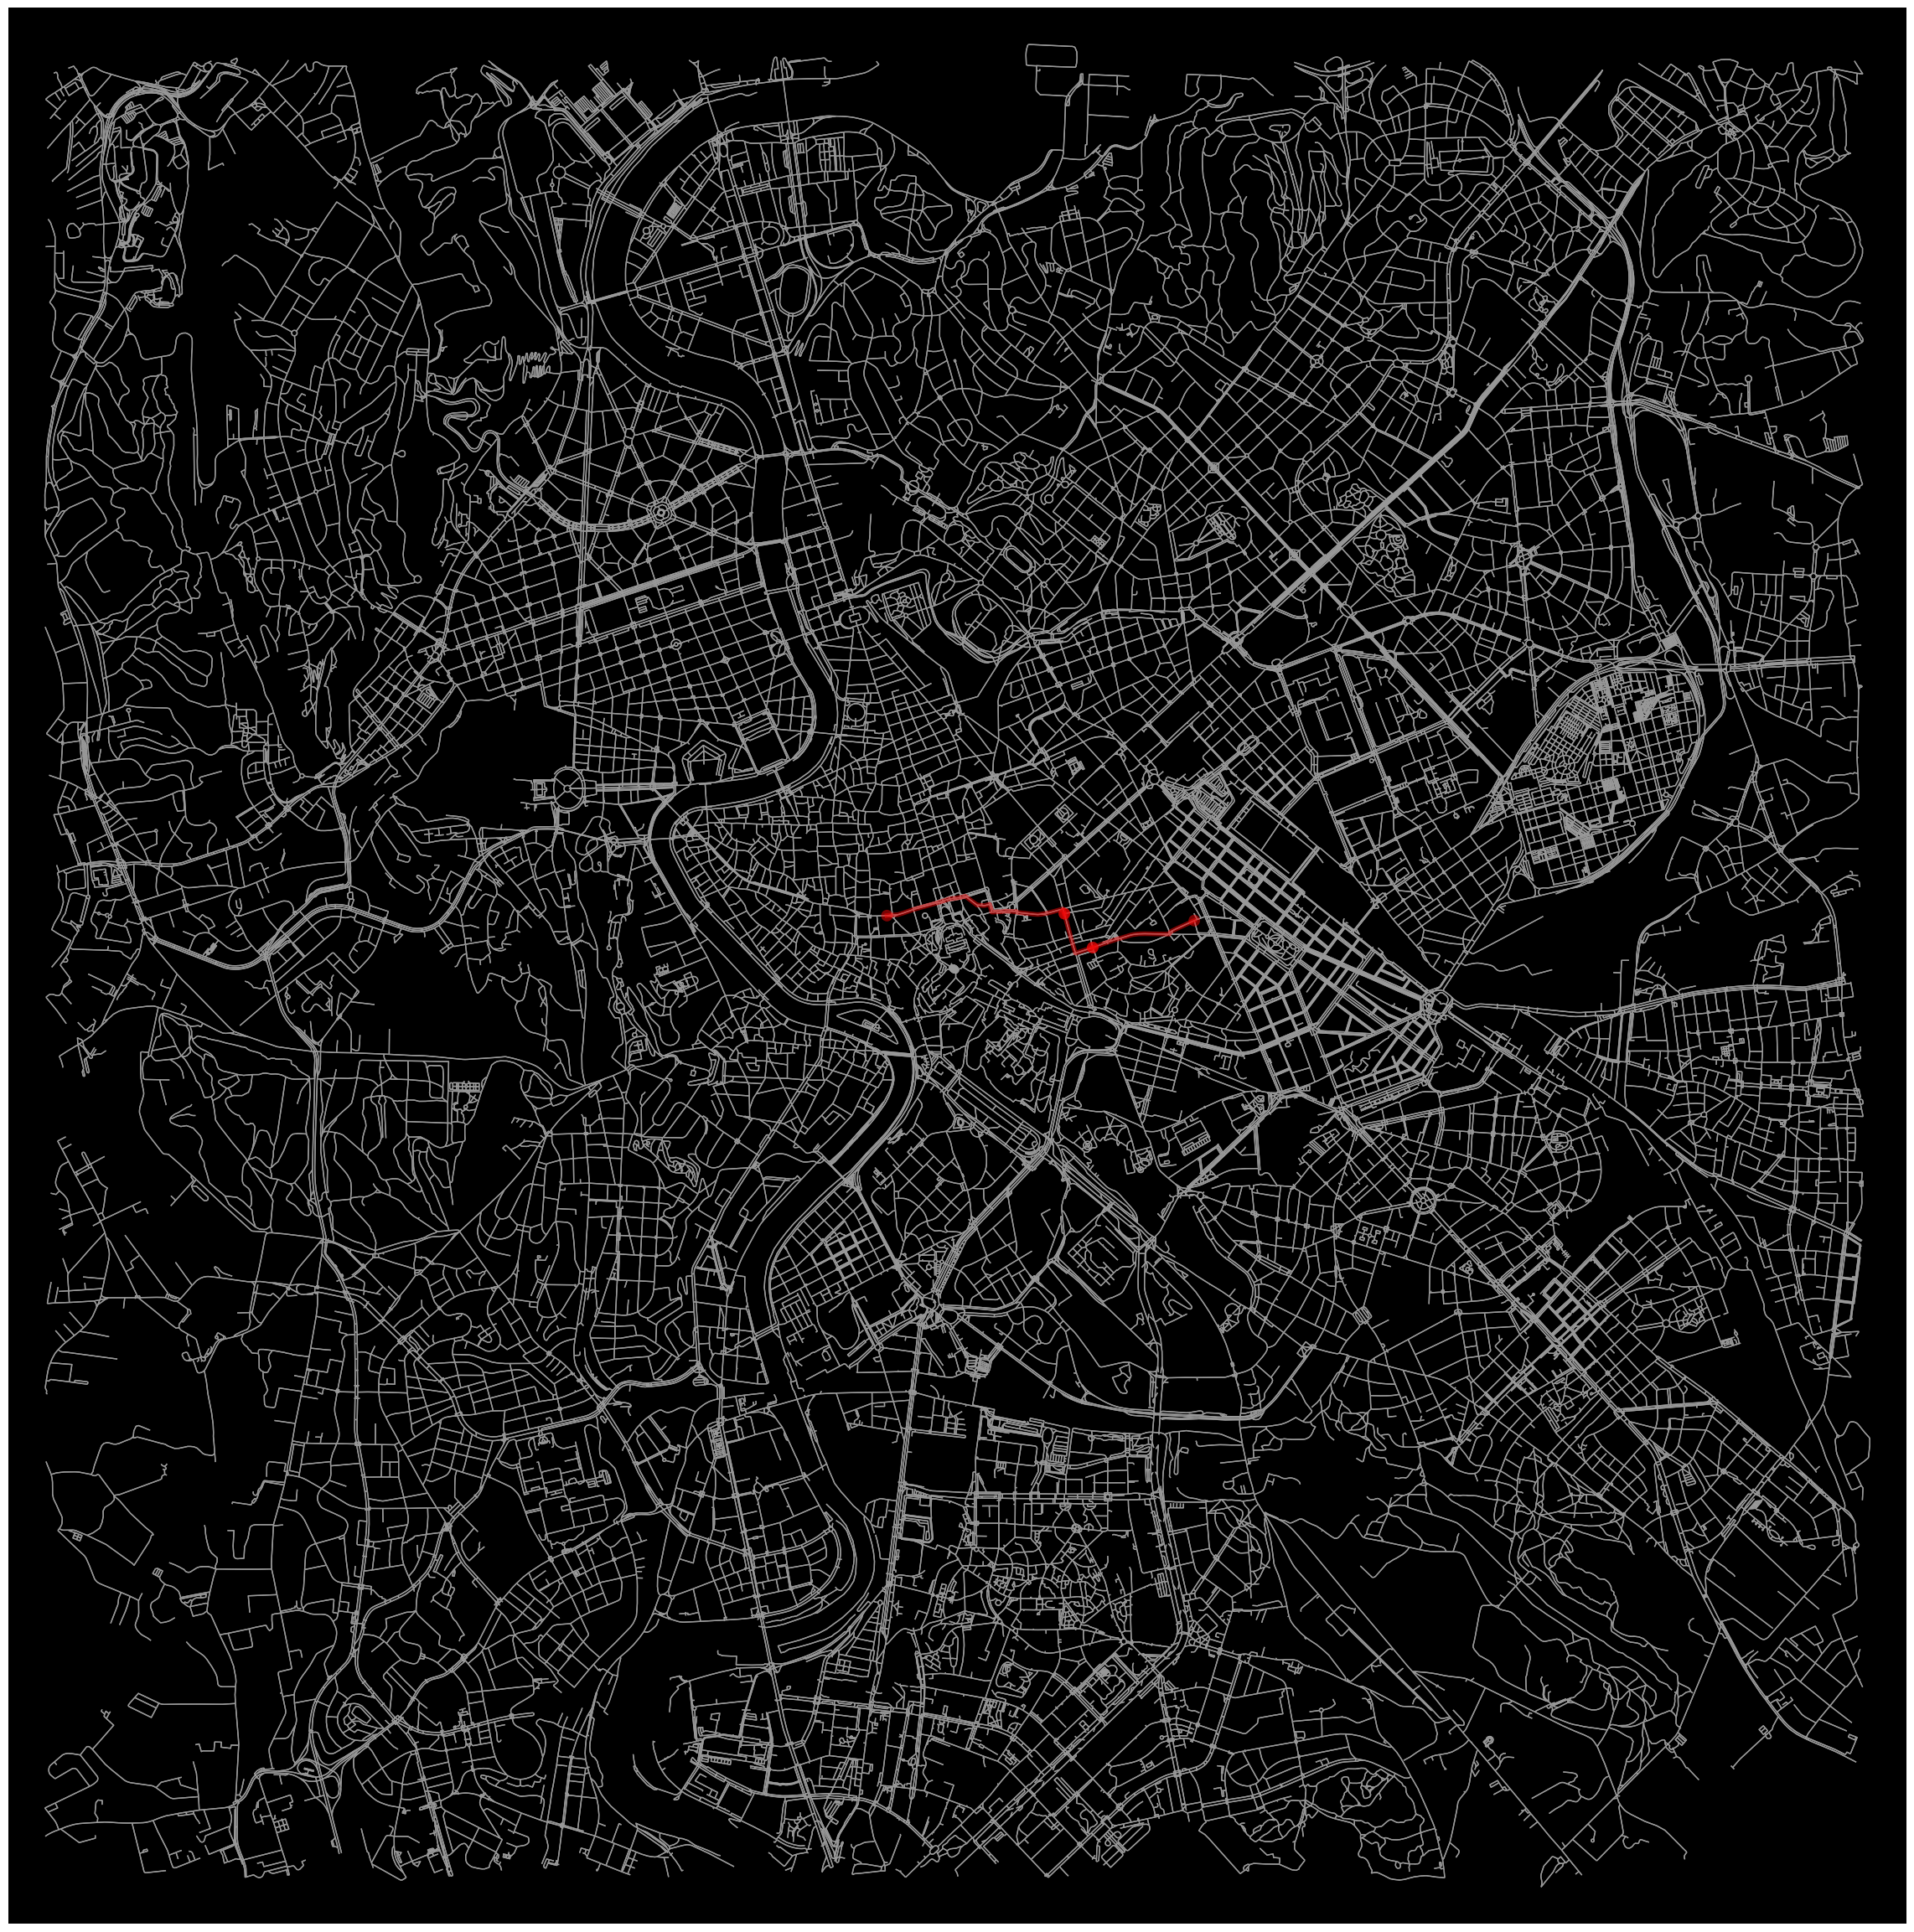

(<Figure size 4200x2970 with 1 Axes>, <AxesSubplot:>)

In [10]:
ox.plot_graph_routes(
    G1, routes_list,route_colors=Color,
    route_linewidth=5, node_size=0, bgcolor="k",
    figsize=(42,29.7),dpi=1200,save=True,
    filepath="Output/output.png"
)

Possible output eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff